In [12]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
from pyod.models.knn import KNN
from pyod.utils.data import generate_data, get_outliers_inliers

In [13]:
X_train, y_train = generate_data(n_train = 300, train_only = True, n_features = 2)
outlier_fraction = 0.1
X_outliers, X_inliers = get_outliers_inliers(X_train, y_train)
n_inliers = len(X_inliers)
n_outliers = len(X_outliers)

f1 = X_train[:, [0]].reshape(-1, 1)
f2 = X_train[:, [1]].reshape(-1, 1)

Text(0, 0.5, 'Feature 2')

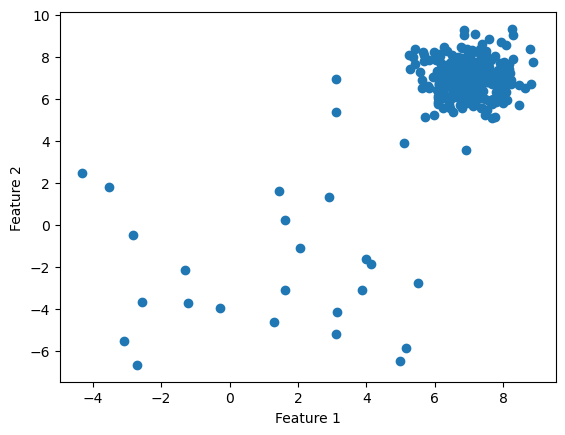

In [14]:
# Visualising the dataset 
# create a meshgrid 
xx, yy = np.meshgrid(np.linspace(-10, 10, 200), 
                     np.linspace(-10, 10, 200)) 
# scatter plot 
plt.scatter(f1, f2) 
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 

In [15]:
# Training the classifier 
clf = KNN(contamination = outlier_fraction) 
clf.fit(X_train, y_train) 

/Users/benjamin/opt/anaconda3/lib/python3.9/site-packages/pyod/models/base.py:430: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [17]:
# You can print this to see all the prediction scores 
scores_pred = clf.decision_function(X_train)*-1
scores_pred

array([-0.25006829, -0.12440473, -0.14881425, -0.16869961, -0.26295465,
       -0.68038213, -0.57603007, -0.17272214, -0.09309312, -0.21646494,
       -0.25522456, -0.18980801, -0.11529446, -0.11448305, -0.24864039,
       -0.11136806, -0.1175083 , -0.19056763, -0.20527751, -0.20231891,
       -0.17783889, -0.15492443, -0.19810633, -0.23443627, -0.2351108 ,
       -0.18032941, -0.17977683, -0.13548159, -0.36078808, -0.24845658,
       -0.29419694, -0.17919631, -0.28034105, -0.43648907, -0.19564395,
       -0.1181201 , -0.1553523 , -0.24795269, -0.42117127, -0.18118318,
       -0.23760704, -0.1426024 , -0.21121792, -0.15618881, -0.21528071,
       -0.09137025, -0.15078878, -0.16649001, -0.10999469, -0.59874262,
       -0.10443688, -0.20062914, -0.38861173, -0.29642644, -0.16152708,
       -0.18156374, -1.82216918, -0.17106561, -0.39139715, -0.25437557,
       -0.33890153, -0.13221822, -0.17514802, -0.25269432, -0.14532655,
       -0.11261778, -0.26073677, -0.11537191, -0.08979193, -0.14

In [18]:
y_pred = clf.predict(X_train) 
n_errors = (y_pred != y_train).sum()   

print('The number of prediction errors are ' + str(n_errors)) 

The number of prediction errors are 5


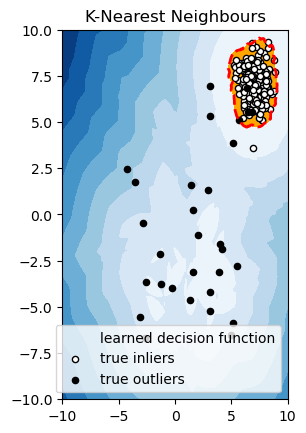

In [19]:
# threshold value to consider a 
# datapoint inlier or outlier 
threshold = stats.scoreatpercentile(scores_pred, 100 * outlier_fraction) 
  
# decision function calculates the raw  
# anomaly score for every point 
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape) 
  
# fill blue colormap from minimum anomaly 
# score to threshold value 
subplot = plt.subplot(1, 2, 1) 
subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(),  
                  threshold, 10), cmap = plt.cm.Blues_r) 
  
# draw red contour line where anomaly  
# score is equal to threshold 
a = subplot.contour(xx, yy, Z, levels =[threshold], 
                     linewidths = 2, colors ='red') 
  
# fill orange contour lines where range of anomaly 
# score is from threshold to maximum anomaly score 
subplot.contourf(xx, yy, Z, levels =[threshold, Z.max()], colors ='orange') 
  
# scatter plot of inliers with white dots 
b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], 
                                    c ='white', s = 20, edgecolor ='k')  
  
# scatter plot of outliers with black dots 
c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1],  
                                    c ='black', s = 20, edgecolor ='k') 
subplot.axis('tight') 
  
subplot.legend( 
    [a.collections[0], b, c], 
    ['learned decision function', 'true inliers', 'true outliers'], 
    prop = matplotlib.font_manager.FontProperties(size = 10), 
    loc ='lower right') 
  
subplot.set_title('K-Nearest Neighbours') 
subplot.set_xlim((-10, 10)) 
subplot.set_ylim((-10, 10)) 
plt.show()  